In [3]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import f1_score

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn'
sat_train = pd.read_csv(url, header=None, sep=' ');
print(sat_train.shape)

url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst'
sat_test = pd.read_csv(url1, header=None, sep=' ',);
print(sat_test.shape)

X_train = sat_train.iloc[:, :-1] 
y_train = sat_train.iloc[:, -1] 
X_test = sat_test.iloc[:, :-1] 
y_test = sat_test.iloc[:, -1] 

sat_train.rename(columns={36: 'Class'}, inplace=True)
sat_test.rename(columns={36: 'Class'}, inplace=True)

sat_train['Class'].value_counts()

(4435, 37)
(2000, 37)


1    1072
7    1038
3     961
2     479
5     470
4     415
Name: Class, dtype: int64

In [4]:
sat_test['Class'].value_counts()

7    470
1    461
3    397
5    237
2    224
4    211
Name: Class, dtype: int64

In [5]:
txt = ['top_left1', 'top_left2', 'top_left3', 'top_left4', 
       'top_center1', 'top_center2', 'top_center3', 'top_center4',
       'top_right1', 'top_right2', 'top_right3', 'top_right4',
       'middle_left1', 'middle_left2', 'middle_left3', 'middle_left4', 
       'middle_center1', 'middle_center2', 'middle_center3', 'middle_center4',
       'middle_right1', 'middle_right2', 'middle_right3', 'middle_right4',
       'bottom_left1', 'bottom_left2', 'bottom_left3', 'bottom_left4', 
       'bottom_center1', 'bottom_center2', 'bottom_center3', 'bottom_center4',
       'bottom_right1', 'bottom_right2', 'bottom_right3', 'bottom_right4', 'Class']

sat_train = pd.read_csv(url, header=None, sep=' ',names=txt,dtype=str);
sat_train

,top_left1,top_left2,top_left3,top_left4,top_center1,top_center2,top_center3,top_center4,top_right1,top_right2,...,bottom_left4,bottom_center1,bottom_center2,bottom_center3,bottom_center4,bottom_right1,bottom_right2,bottom_right3,bottom_right4,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,5
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,5
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,4
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,4


In [33]:
from sklearn.ensemble import RandomForestClassifier 
n = 5
f1_rf_sum = []
for i in range (n) :
# Xây dựng mô hình Random Forest 
  rf_model = RandomForestClassifier(n_estimators=50) 
  rf_model.fit(X_train, y_train) 
  y_pred = rf_model.predict(X_test) 
  f1_rf = f1_score(y_test, y_pred, average='macro') 
  f1_rf_sum.append(f1_rf)
  print("F1 lan lap thu",i+1,":",f1_rf)
sum0= 0
for s in f1_rf_sum :
  sum0 += s
rf_avg = sum0/len(f1_rf_sum)
print("F1 trung binh cua 5 lan lap:" ,rf_avg)

F1 lan lap thu 1 : 0.8872775478594015
F1 lan lap thu 2 : 0.894458065546238
F1 lan lap thu 3 : 0.8906130367197281
F1 lan lap thu 4 : 0.8943599529311509
F1 lan lap thu 5 : 0.8956191183222301
F1 trung binh cua 5 lan lap: 0.8924655442757498


In [29]:
from sklearn.neighbors import KNeighborsClassifier
#KNN
n=5 
f1_knn_sum = []
for i in range(n):
  knn_model = KNeighborsClassifier(n_neighbors=80) 
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  f1_knn = f1_score(y_test, y_pred, average='macro')
  f1_knn_sum.append(f1_knn)
  print("F1 lan lap thu",i+1,":",f1_knn)
sum =0
for s in f1_knn_sum :
  sum += s
knn_avg = sum/len(f1_knn_sum)
print("F1 trung binh cua 5 lan lap:" ,knn_avg)

F1 lan lap thu 1 : 0.8267449621266362
F1 lan lap thu 2 : 0.8267449621266362
F1 lan lap thu 3 : 0.8267449621266362
F1 lan lap thu 4 : 0.8267449621266362
F1 lan lap thu 5 : 0.8267449621266362
F1 trung binh cua 5 lan lap: 0.8267449621266362


In [32]:
from sklearn.tree import DecisionTreeClassifier
n = 5 
f1_dt_sum = []
for i in range(n):
# Xây dựng mô hình decision tree
  dt_model = DecisionTreeClassifier(criterion="gini",max_depth=5)
  dt_model.fit(X_train, y_train)
  y_pred = dt_model.predict(X_test)
  f1_dt = f1_score(y_test, y_pred, average='macro')
  f1_dt_sum.append(f1_dt)
  print("F1 lan lap thu",i+1,":", f1_dt)
sum1= 0
for s in f1_dt_sum :
  sum1 += s
dt_avg = sum1/len(f1_dt_sum)
print("F1 trung binh cua 5 lan lap:" ,dt_avg)

F1 lan lap thu 1 : 0.7652066283216542
F1 lan lap thu 2 : 0.7648182004362885
F1 lan lap thu 3 : 0.7652066283216542
F1 lan lap thu 4 : 0.76512911106518
F1 lan lap thu 5 : 0.7652066283216542
F1 trung binh cua 5 lan lap: 0.7651134392932863


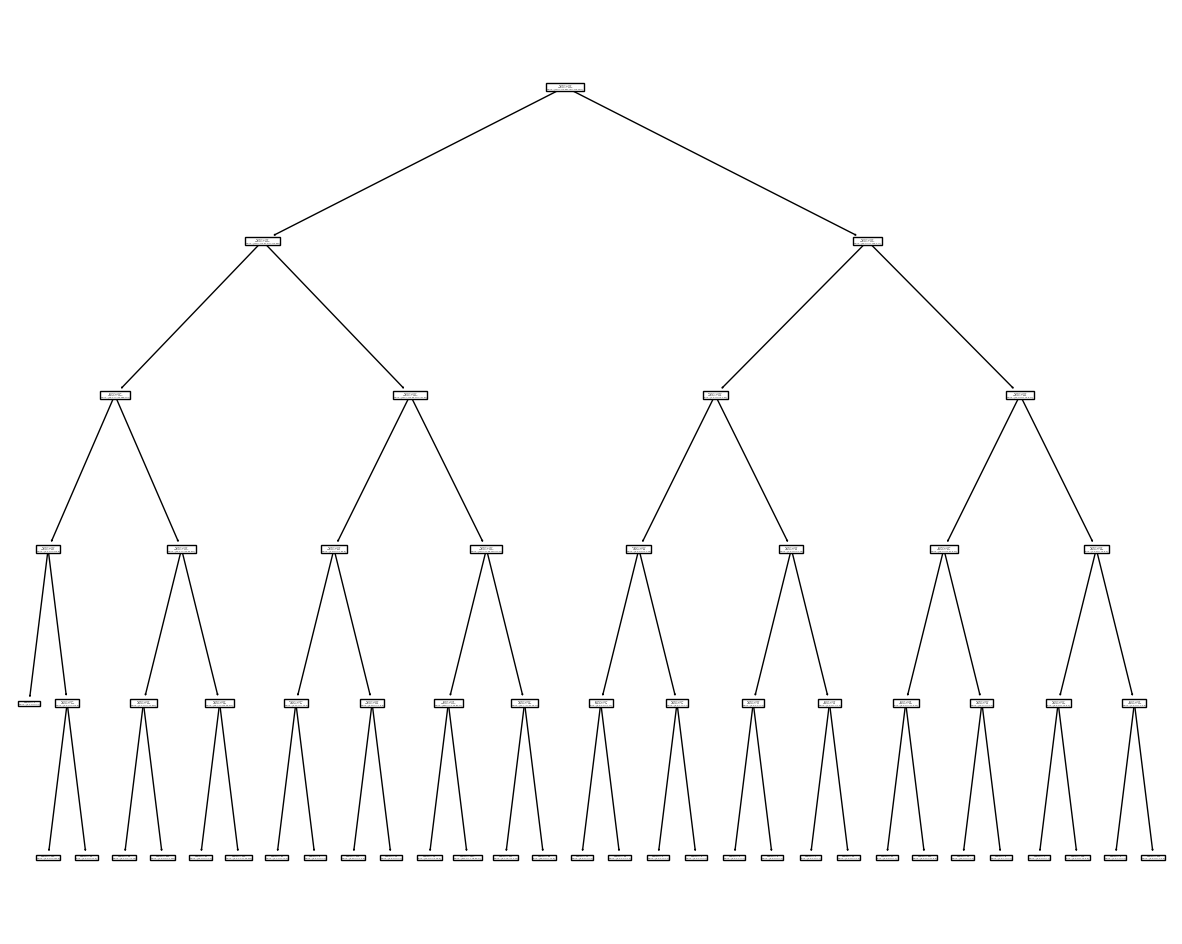

In [23]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 12))
plot_tree(dt_model,ax=ax)
plt.show()

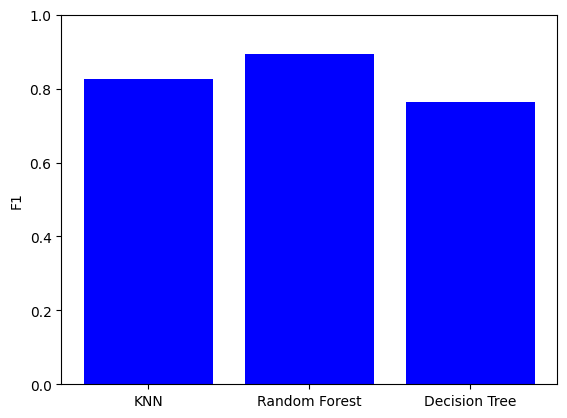

In [22]:
models = ['KNN','Random Forest','Decision Tree'] 
f1 = [f1_knn,f1_rf,f1_dt] 
plt.bar(models, f1, color='blue') 
plt.ylabel("F1") 
plt.ylim(0.0, 1.0) 
plt.show()